In [124]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV


In [125]:
df = pd.read_csv('CarPrice_Assignment.csv')


In [126]:
df.shape

(205, 26)

In [127]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [129]:
df.drop(columns=['car_ID', 'symboling', 'CarName'], inplace=True)

In [130]:
categorical_col = df.select_dtypes(include='object').columns
#We assigned the categorical columns to the categorical col value.


In [131]:
numeric_col = df.select_dtypes(exclude='object').columns
#We assigned the numerical columns to the categorical col value.

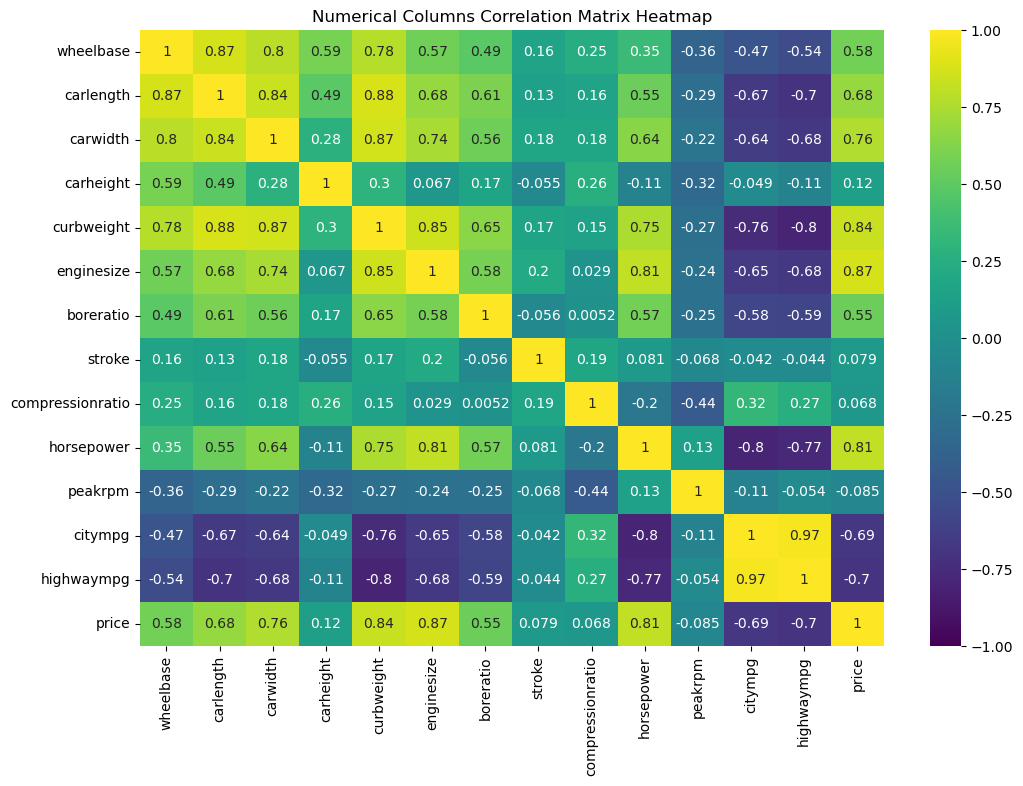

In [132]:
df_numeric = df[numeric_col]
corr_matrix_numeric = df_numeric.corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix_numeric, annot=True, cmap='viridis', vmin=-1, vmax=1) 
plt.title('Numerical Columns Correlation Matrix Heatmap')
plt.show()

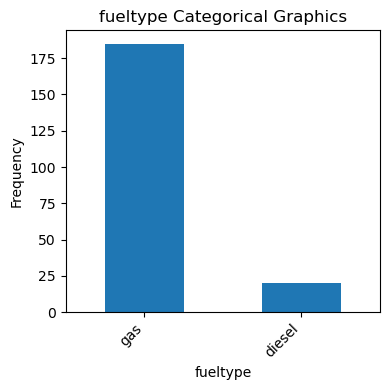

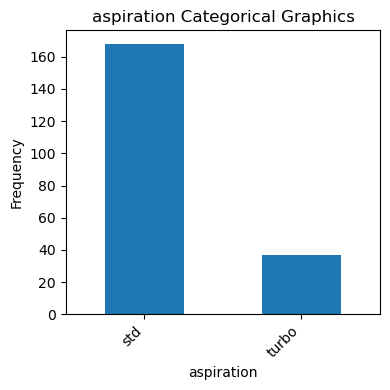

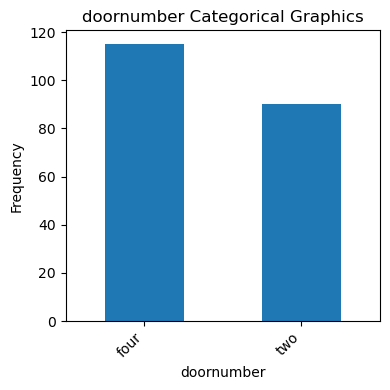

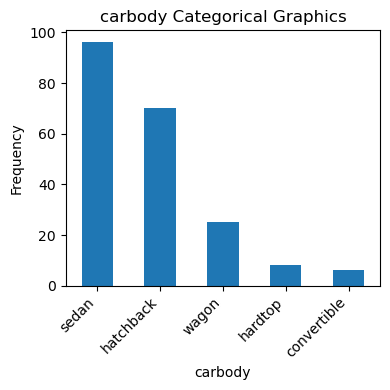

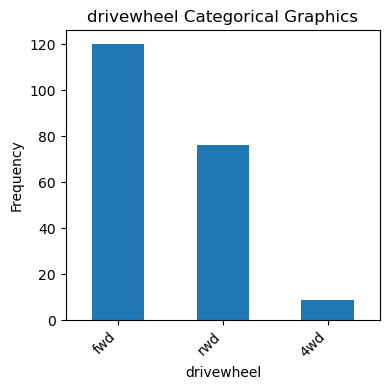

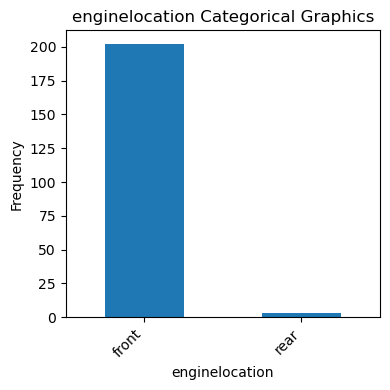

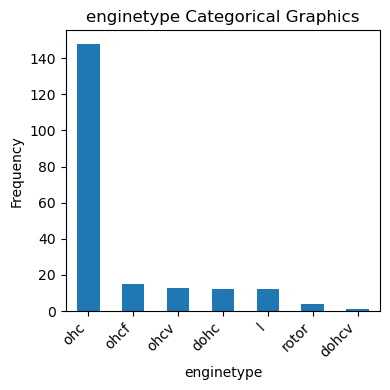

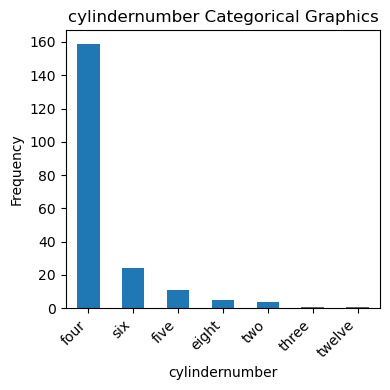

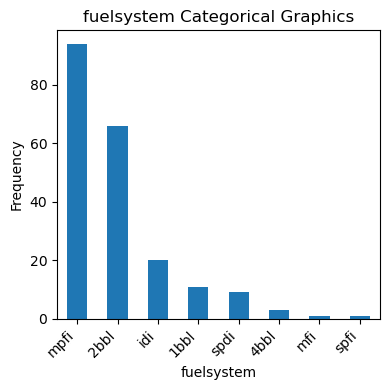

In [133]:
for col in categorical_col:
    plt.figure(figsize=(4, 4))  
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Categorical Graphics')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()

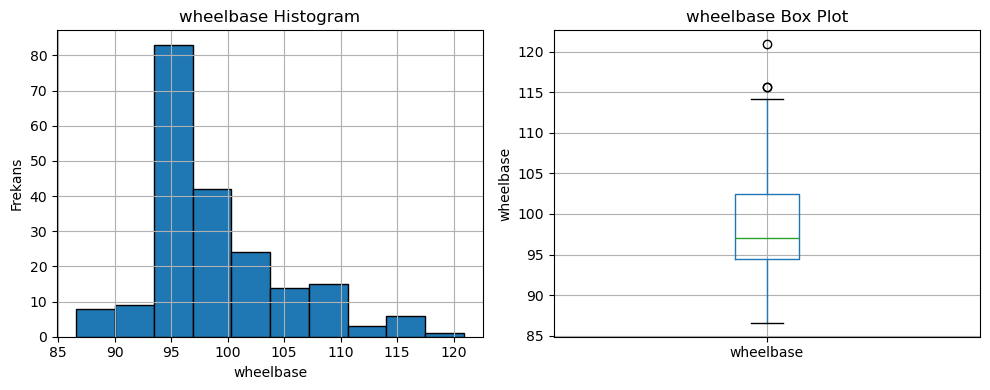

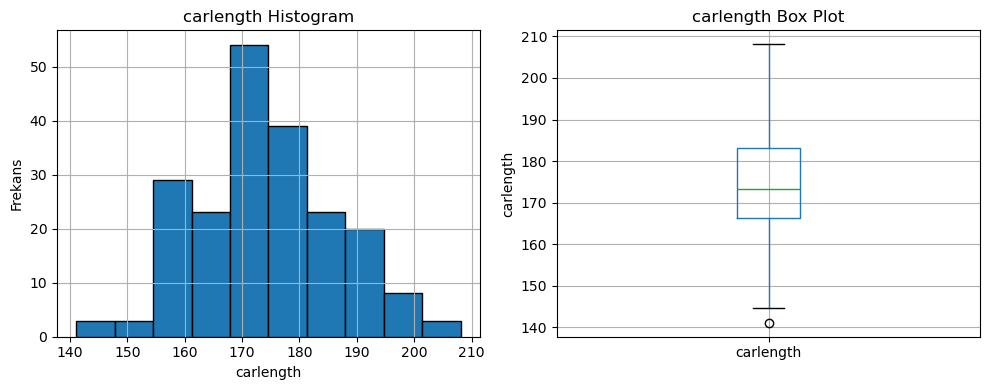

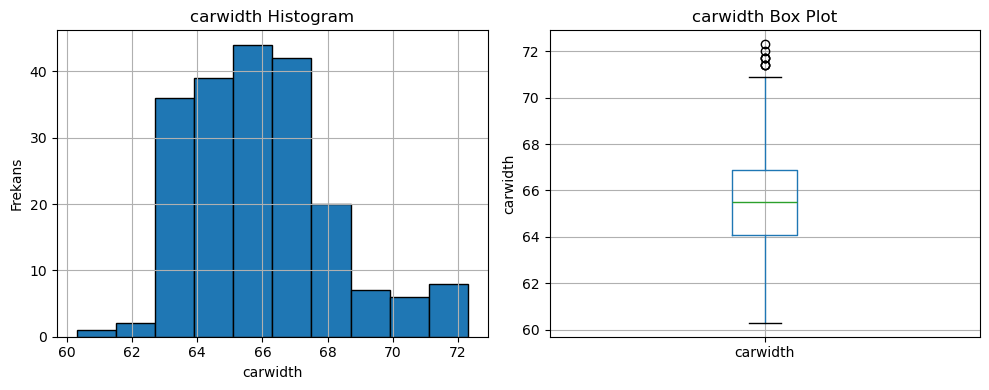

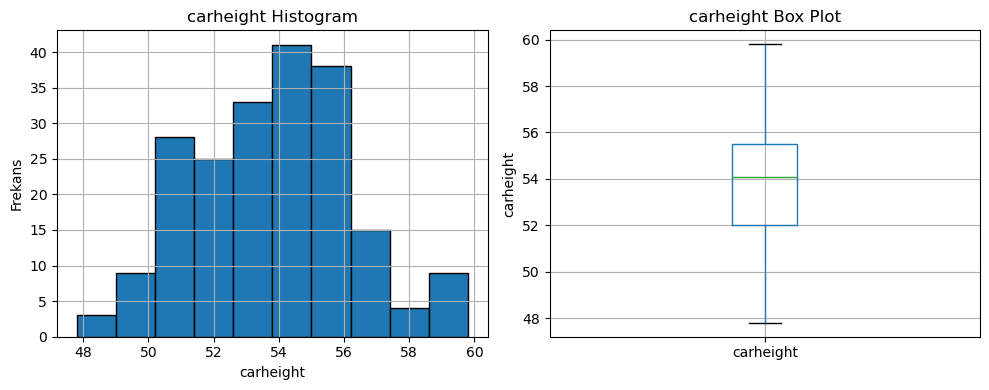

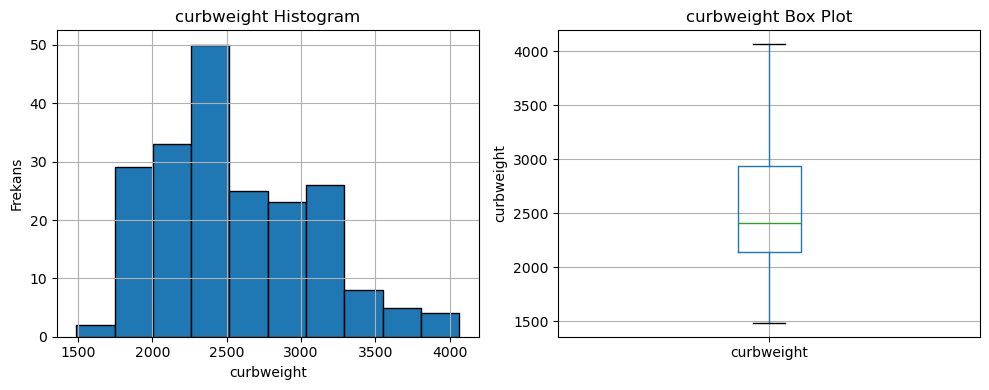

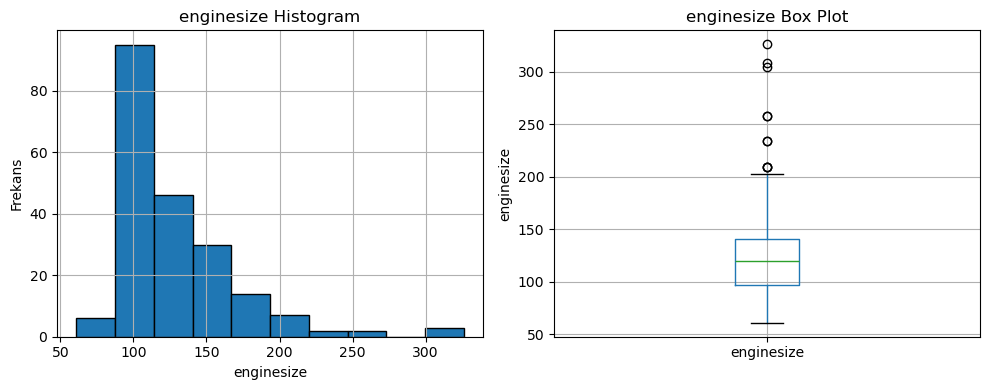

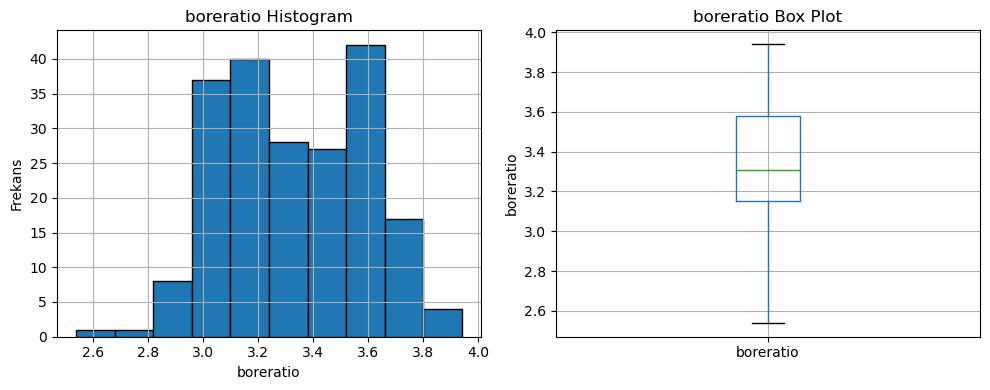

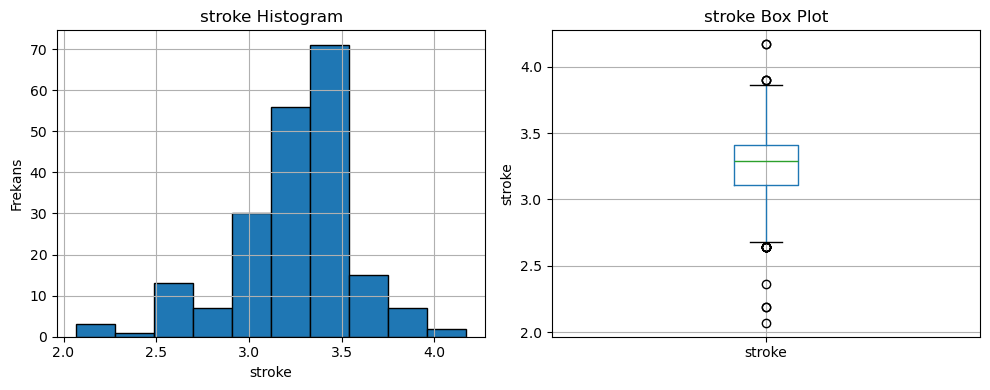

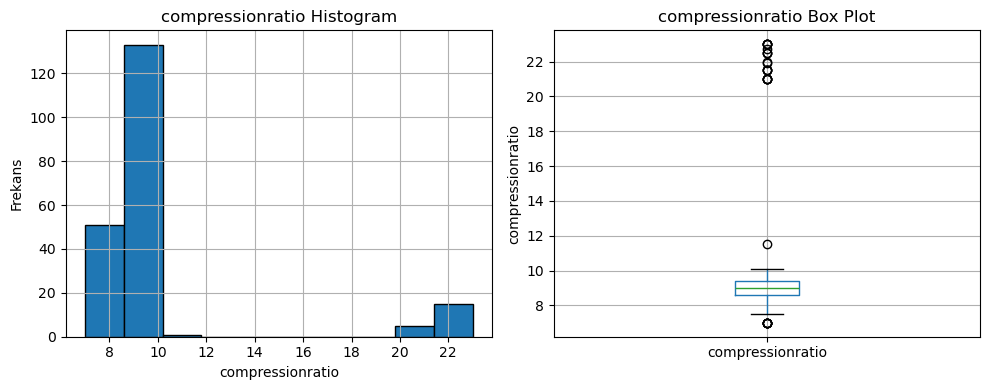

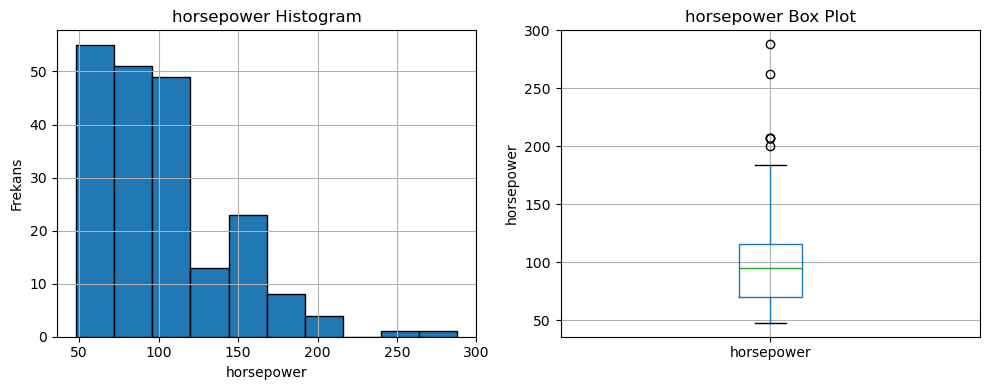

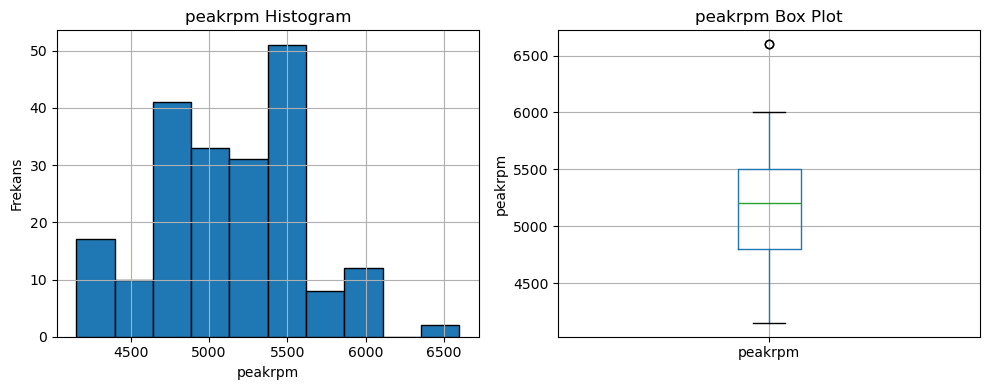

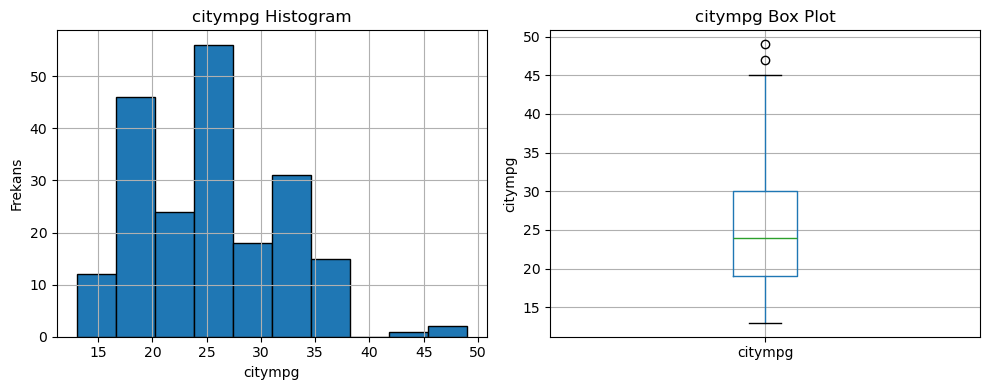

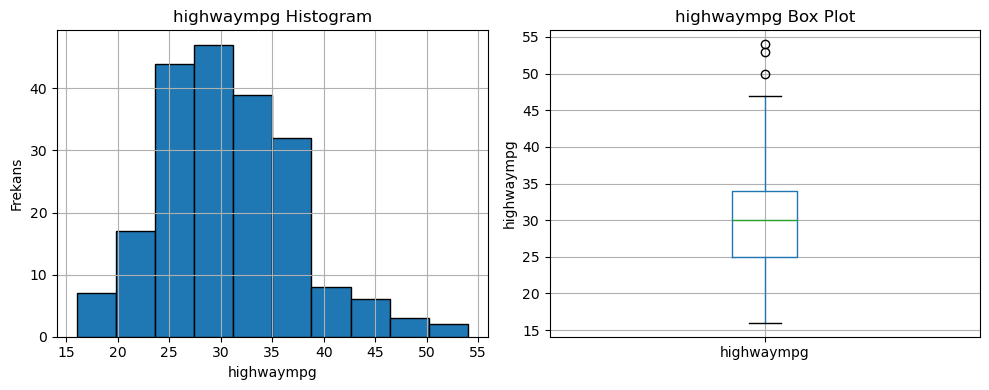

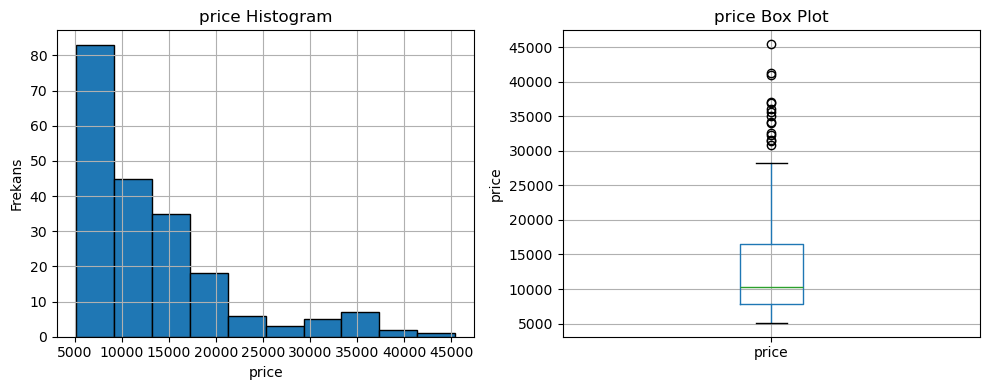

In [134]:
for col in numeric_col:
    # Histogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=10, edgecolor='black')  
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frekans')

    # Box Plot
    plt.subplot(1, 2, 2)
    df.boxplot(column=col)
    plt.title(f'{col} Box Plot')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

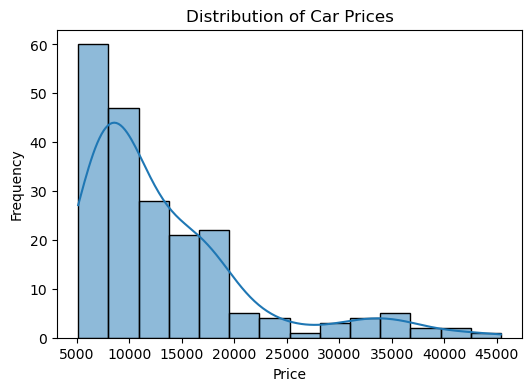

In [135]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

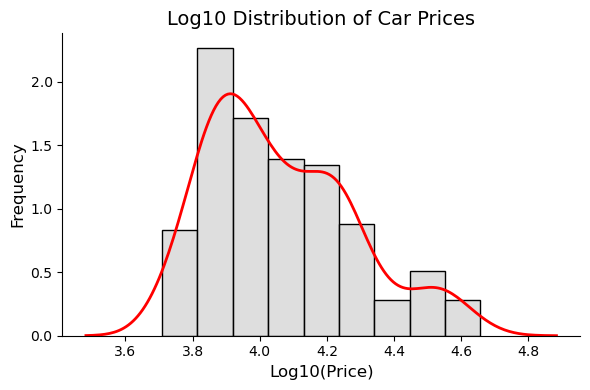

In [136]:
df['price_log10'] = np.log10(df['price'])
#We apply log for a more symmetric distribution.

plt.figure(figsize=(6, 4))
sns.histplot(df['price_log10'], color='lightgray', edgecolor='black', stat='density') 
sns.kdeplot(df['price_log10'], color='red', linewidth=2) # Highlighting the density curve
plt.title('Log10 Distribution of Car Prices', fontsize=14)
plt.xlabel('Log10(Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
le = LabelEncoder()
#We will use labelencoder for our object values.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [139]:
X =  df.drop('price' ,axis=1)
y = df['price']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
#Using the trained linear regression model, 
#we predicted the car prices in the test dataset and assigned these predictions to the y_pred_lr variable.
r2_lr = r2_score(y_test, y_pred_lr)
#We calculate the R-squared score.
mse_lr = mean_squared_error(y_test, y_pred_lr)
#We calculate the Mean Squared Error (MSE).
rmse_lr = np.sqrt(mse_lr)
#We calculate the Root Mean Squared Error (RMSE).
print("Linear Regression Results:")
print(f"R-squared: {r2_lr:.4f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}\n")



Linear Regression Results:
R-squared: 0.9540, MSE: 3630784.72, RMSE: 1905.46



In [142]:
#Ridge Regression
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]
#We select the best alpha value by performing cross validation on the list of alpha values.
ridge_cv = RidgeCV(alphas=alpha_values, cv=10)
ridge_cv.fit(X_train, y_train)

best_alpha_ridgecv = ridge_cv.alpha_
print(f"best alpha : {best_alpha_ridgecv}")
model_ridge_best = Ridge(alpha=best_alpha_ridgecv)
model_ridge_best.fit(X_train, y_train)
y_pred_ridge_best = model_ridge_best.predict(X_test)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
rmse_ridge_best = np.sqrt(mse_ridge_best)

print("\nRidge Regression Results (With Best Alpha):")
print(f"R-squared: {r2_ridge_best:.4f}, MSE: {mse_ridge_best:.2f}, RMSE: {rmse_ridge_best:.2f}\n")

#We obtained a value that approximates the standard linear regression of Ridge Regression.


best alpha : 0.01

Ridge Regression Results (With Best Alpha):
R-squared: 0.9533, MSE: 3684289.52, RMSE: 1919.45



In [143]:
# Lasso Regression
alpha_values_lasso = np.logspace(-4, 0, 10)
#We select the best alpha value by performing cross validation on the list of alpha values.
lasso_cv = LassoCV(alphas=alpha_values_lasso, cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lassocv = lasso_cv.alpha_
print(f"best alpha: {best_alpha_lassocv}")

model_lasso_best = Lasso(alpha=best_alpha_lassocv)
model_lasso_best.fit(X_train, y_train)
y_pred_lasso_best = model_lasso_best.predict(X_test)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
rmse_lasso_best = np.sqrt(mse_lasso_best)

print("\nLasso  Regression Results (With Best Alpha):")
print(f"R-squared: {r2_lasso_best:.4f}, MSE: {mse_lasso_best:.2f}, RMSE: {rmse_lasso_best:.2f}\n")



best alpha: 1.0

Lasso  Regression Results (With Best Alpha):
R-squared: 0.9533, MSE: 3689406.60, RMSE: 1920.78



In [144]:
# Polynomial  Regression
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print("Polynomial   Regression Results:")
print(f"R-squared: {r2_poly:.4f}, MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}\n")



Polynomial   Regression Results:
R-squared: 0.8449, MSE: 12246777.28, RMSE: 3499.54



In [145]:
#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) 
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Regressor Results:")
print(f"R-squared: {r2_rf:.4f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}\n")



Random Forest Regressor Results:
R-squared: 0.9892, MSE: 851832.70, RMSE: 922.95



In [146]:
#Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print("Gradient Boosting Regressor Results:")
print(f"R-squared: {r2_gb:.4f}, MSE: {mse_gb:.2f}, RMSE: {rmse_gb:.2f}\n")


Gradient Boosting Regressor Results:
R-squared: 0.9915, MSE: 672933.67, RMSE: 820.33



In [147]:
print("--- Model Performance Summary ---")
print(f"Linear Regression - R-squared: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")
print(f"Ridge Regression     - R-squared: {r2_ridge_best:.4f}, RMSE: {rmse_ridge_best:.2f}")
print(f"Lasso Regression       - R-squared: {r2_lasso_best:.4f}, RMSE: {rmse_lasso_best:.2f}")
print(f"Polynomial  Regression - R-squared: {r2_poly:.4f}, RMSE: {rmse_poly:.2f}")
print(f"Random Forest Regressor   - R-squared: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")
print(f"Gradient Boosting Regressor    - R-squared: {r2_gb:.4f}, RMSE: {rmse_gb:.2f}")

--- Model Performance Summary ---
Linear Regression - R-squared: 0.9540, RMSE: 1905.46
Ridge Regression     - R-squared: 0.9533, RMSE: 1919.45
Lasso Regression       - R-squared: 0.9533, RMSE: 1920.78
Polynomial  Regression - R-squared: 0.8449, RMSE: 3499.54
Random Forest Regressor   - R-squared: 0.9892, RMSE: 922.95
Gradient Boosting Regressor    - R-squared: 0.9915, RMSE: 820.33


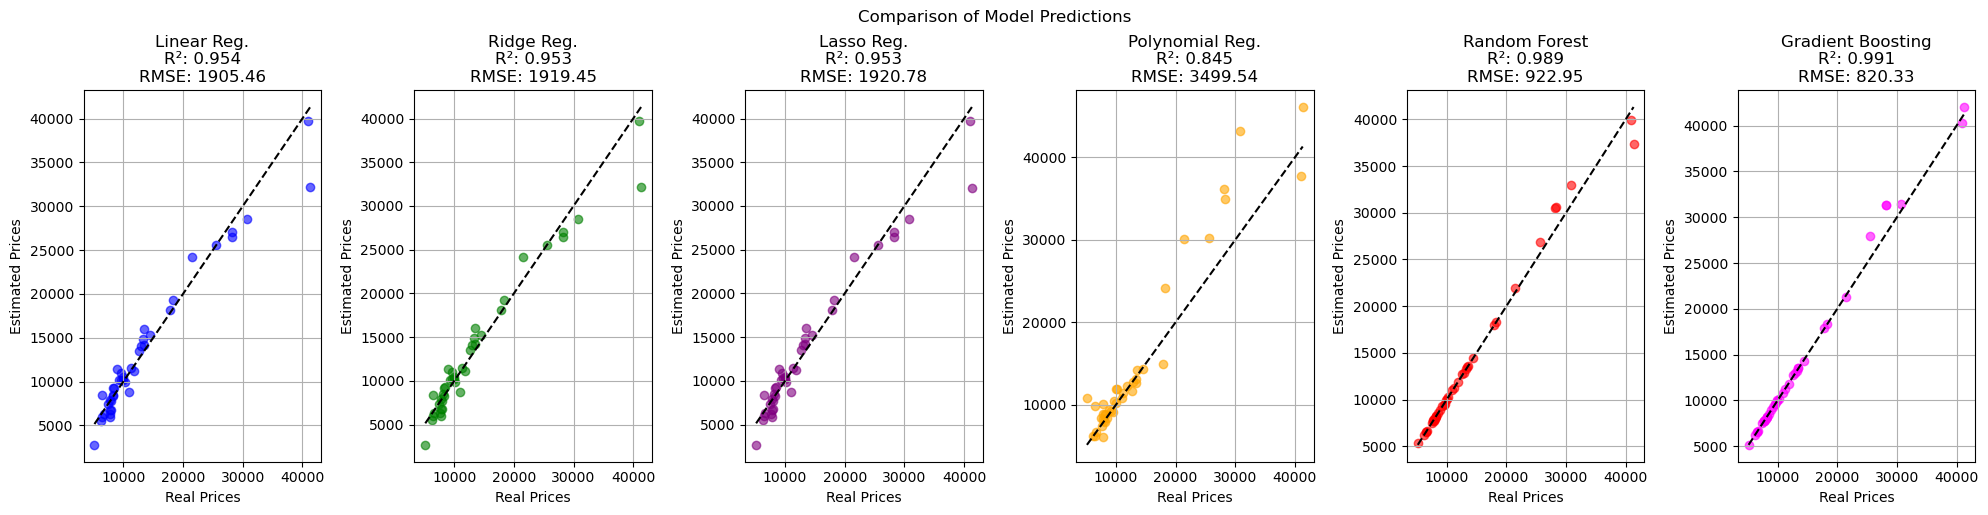

In [148]:
plt.figure(figsize=(20, 5))

# Linear Regression
plt.subplot(1, 6, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Linear Reg.\nR²: {r2_score(y_test, y_pred_lr):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Ridge Regression
plt.subplot(1, 6, 2)
plt.scatter(y_test, y_pred_ridge_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Ridge Reg.\nR²: {r2_score(y_test, y_pred_ridge_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge_best)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Lasso Regression
plt.subplot(1, 6, 3)
plt.scatter(y_test, y_pred_lasso_best, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Lasso Reg.\nR²: {r2_score(y_test, y_pred_lasso_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso_best)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Polynomial Regression
plt.subplot(1, 6, 4)
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Polynomial Reg.\nR²: {r2_score(y_test, y_pred_poly):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Random Forest Regressor
plt.subplot(1, 6, 5)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Random Forest\nR²: {r2_score(y_test, y_pred_rf):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Gradient Boosting Regressor
plt.subplot(1, 6, 6)
plt.scatter(y_test, y_pred_gb, color='magenta', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Gradient Boosting\nR²: {r2_score(y_test, y_pred_gb):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

plt.tight_layout()
plt.suptitle('Comparison of Model Predictions', y=1.02)
plt.show()

In [149]:
#Let's retrain it with our pricelog10 value.

In [150]:
df_log =  df.drop('price' ,axis=1)


In [151]:
X =  df_log.drop('price_log10' ,axis=1)
y = df_log['price_log10']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
#Using the trained linear regression model, 
#we predicted the car prices in the test dataset and assigned these predictions to the y_pred_lr variable.
r2_lr = r2_score(y_test, y_pred_lr)
#We calculate the R-squared score.
mse_lr = mean_squared_error(y_test, y_pred_lr)
#We calculate the Mean Squared Error (MSE).
rmse_lr = np.sqrt(mse_lr)
#We calculate the Root Mean Squared Error (RMSE).
print("Linear Regression Results:")
print(f"R-squared: {r2_lr:.4f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}\n")

#Ridge Regression
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]
#We select the best alpha value by performing cross validation on the list of alpha values.
ridge_cv = RidgeCV(alphas=alpha_values, cv=10)
ridge_cv.fit(X_train, y_train)
best_alpha_ridgecv = ridge_cv.alpha_
print(f"best alpha : {best_alpha_ridgecv}")
model_ridge_best = Ridge(alpha=best_alpha_ridgecv)
model_ridge_best.fit(X_train, y_train)
y_pred_ridge_best = model_ridge_best.predict(X_test)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
rmse_ridge_best = np.sqrt(mse_ridge_best)

print("\nRidge Regression Results (With Best Alpha):")
print(f"R-squared: {r2_ridge_best:.4f}, MSE: {mse_ridge_best:.2f}, RMSE: {rmse_ridge_best:.2f}\n")




# Lasso Regression
alpha_values_lasso = np.logspace(-4, 0, 10)
#We select the best alpha value by performing cross validation on the list of alpha values.
lasso_cv = LassoCV(alphas=alpha_values_lasso, cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lassocv = lasso_cv.alpha_
print(f"best alpha: {best_alpha_lassocv}")
model_lasso_best = Lasso(alpha=best_alpha_lassocv)
model_lasso_best.fit(X_train, y_train)
y_pred_lasso_best = model_lasso_best.predict(X_test)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
rmse_lasso_best = np.sqrt(mse_lasso_best)

print("\nLasso  Regression Results (With Best Alpha):")
print(f"R-squared: {r2_lasso_best:.4f}, MSE: {mse_lasso_best:.2f}, RMSE: {rmse_lasso_best:.2f}\n")

# Polynomial  Regression
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print("Polynomial   Regression Results:")
print(f"R-squared: {r2_poly:.4f}, MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}\n")

#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) 
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Regressor Results:")
print(f"R-squared: {r2_rf:.4f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}\n")

#Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print("Gradient Boosting Regressor Results:")
print(f"R-squared: {r2_gb:.4f}, MSE: {mse_gb:.2f}, RMSE: {rmse_gb:.2f}\n")





Linear Regression Results:
R-squared: 0.8393, MSE: 0.01, RMSE: 0.09

best alpha : 10.0

Ridge Regression Results (With Best Alpha):
R-squared: 0.8414, MSE: 0.01, RMSE: 0.09

best alpha: 0.0002782559402207126

Lasso  Regression Results (With Best Alpha):
R-squared: 0.8469, MSE: 0.01, RMSE: 0.09

Polynomial   Regression Results:
R-squared: -201.8274, MSE: 10.38, RMSE: 3.22

Random Forest Regressor Results:
R-squared: 0.9479, MSE: 0.00, RMSE: 0.05

Gradient Boosting Regressor Results:
R-squared: 0.9396, MSE: 0.00, RMSE: 0.06



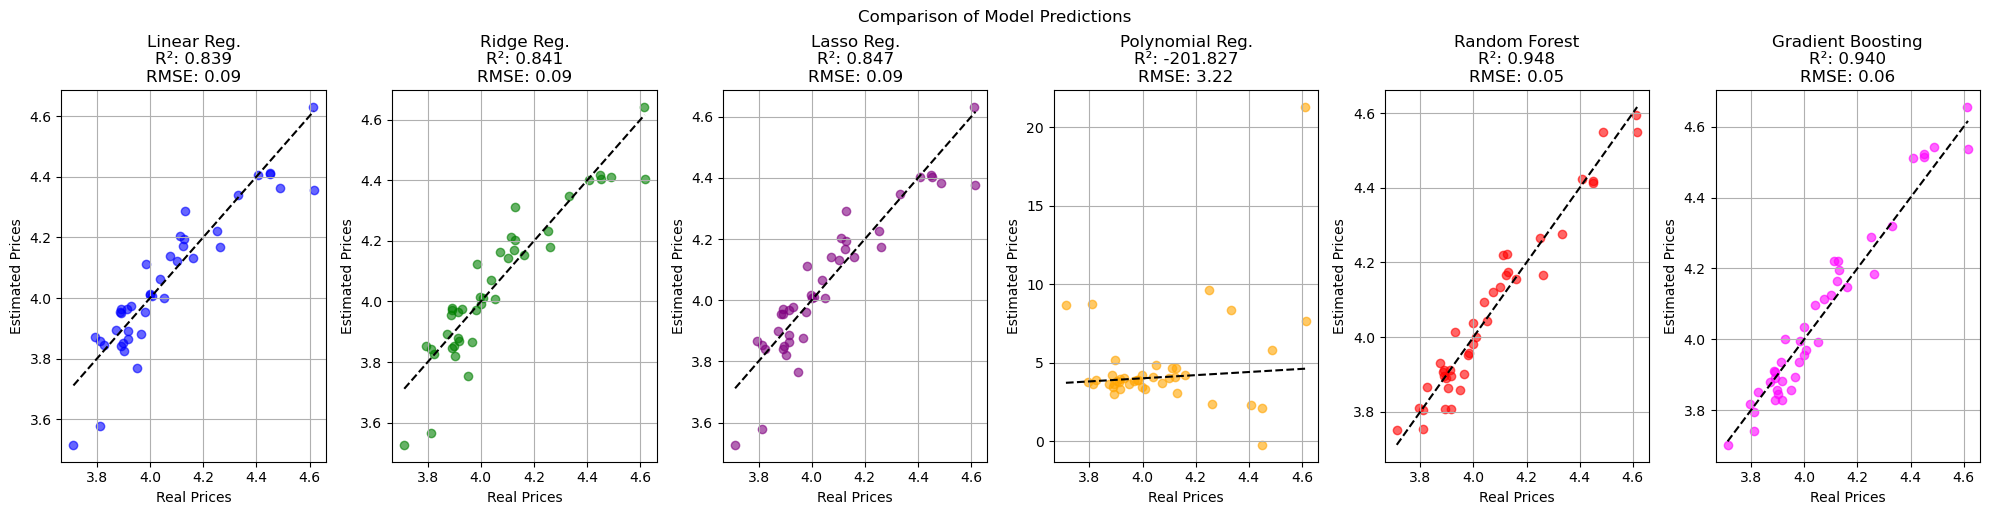

In [154]:
plt.figure(figsize=(20, 5))

# Linear Regression
plt.subplot(1, 6, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Linear Reg.\nR²: {r2_score(y_test, y_pred_lr):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Ridge Regression
plt.subplot(1, 6, 2)
plt.scatter(y_test, y_pred_ridge_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Ridge Reg.\nR²: {r2_score(y_test, y_pred_ridge_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge_best)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Lasso Regression
plt.subplot(1, 6, 3)
plt.scatter(y_test, y_pred_lasso_best, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Lasso Reg.\nR²: {r2_score(y_test, y_pred_lasso_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso_best)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Polynomial Regression
plt.subplot(1, 6, 4)
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Polynomial Reg.\nR²: {r2_score(y_test, y_pred_poly):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Random Forest Regressor
plt.subplot(1, 6, 5)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Random Forest\nR²: {r2_score(y_test, y_pred_rf):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

# Gradient Boosting Regressor
plt.subplot(1, 6, 6)
plt.scatter(y_test, y_pred_gb, color='magenta', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Gradient Boosting\nR²: {r2_score(y_test, y_pred_gb):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.2f}')
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.grid(True)

plt.tight_layout()
plt.suptitle('Comparison of Model Predictions', y=1.02)
plt.show()